In [1]:
import sympy as sp
from sympy.utilities.lambdify import lambdify
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
sp.init_printing()

In [2]:
x = sp.Symbol('x', real = True)
y = sp.Symbol('y', real = True)
n1 = sp.Symbol('n1', integer = True, positive = True)
n2 = sp.Symbol('n2', integer = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)
L = sp.Symbol('L', real = True, positive = True)
sin = sp.Function('sin')
m = sp.Symbol('m', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)

In [3]:
psi = (2 / L) * sin(n1 * sp.pi * x / L) * sin(n2 * sp.pi * y / L)
psi

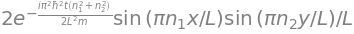

In [4]:
Psi = psi * sp.exp((-sp.I * sp.pi**2 * h**2 * t / (2 * m * L**2)) * (n1**2 + n2**2))
Psi

In [5]:
Psif = lambdify((x, y, t, n1, n2), Psi.subs({h: 1, m: 1, L: 1}))

In [14]:
n1 = 2
n2 = 2
xs = np.linspace(0, 1, 100, dtype=float)
ys = np.linspace(0, 1, 100, dtype=float)
xs, ys = np.meshgrid(xs, ys)

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = "3d")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.close()

dt = 0.001

def frame(i):
    t = i * dt
    zs = Psif(xs, ys, t, n1, n2)
    ax.cla()
    surf1 = ax.plot_surface(xs, ys, zs.real, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
    # surf2 = ax.plot_surface(xs, ys, zs.imag, cmap=cm.coolwarm,
    #                 linewidth=0, antialiased=False)
    ax.set_zlim(-2, 2)
    return surf1,

anim = FuncAnimation(fig, frame, frames = 600, interval = 50, blit = True)
anim.save('2D_infinite_well_2x2.mp4')

In [13]:
n1 = 2
n2 = 2
xs = np.linspace(0, 1, 100, dtype=float)
ys = np.linspace(0, 1, 100, dtype=float)
xs, ys = np.meshgrid(xs, ys)

fig = plt.figure(figsize = (15, 15))
ax = Axes3D(fig)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.close()

dt = 0.001

def frame(i):
    t = i * dt
    zs = np.abs(Psif(xs, ys, t, n1, n2))**2
    ax.cla()
    surf1 = ax.plot_surface(xs, ys, zs, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
    ax.set_zlim(-2, 4)
    return surf1,

anim = FuncAnimation(fig, frame, frames = 600, interval = 50, blit = True)
anim.save('2D_infinite_well_2x2_energy.mp4')

/tmp/ipykernel_3904/14628527.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [12]:
xs = np.linspace(0, 1, 100, dtype=float)
ys = np.linspace(0, 1, 100, dtype=float)
xs, ys = np.meshgrid(xs, ys)

fig = plt.figure(figsize = (15, 15))
ax = Axes3D(fig)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.close()

dt = 0.001

def frame(i):
    t = i * dt
    zs = Psif(xs, ys, t, 1, 2) / np.sqrt(2) + Psif(xs, ys, t, 2, 2) / np.sqrt(2)
    ax.cla()
    surf1 = ax.plot_surface(xs, ys, zs.real, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
    # surf2 = ax.plot_surface(xs, ys, zs.imag, cmap=cm.coolwarm,
    #                 linewidth=0, antialiased=False)
    ax.set_zlim(-2, 4)
    return surf1,

anim = FuncAnimation(fig, frame, frames = 600, interval = 50, blit = True)
anim.save('2D_infinite_well_combined.mp4')

/tmp/ipykernel_3904/4081308061.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [11]:
xs = np.linspace(0, 1, 100, dtype=float)
ys = np.linspace(0, 1, 100, dtype=float)
xs, ys = np.meshgrid(xs, ys)

fig = plt.figure(figsize = (15, 15))
ax = Axes3D(fig)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.close()

dt = 0.001

def frame(i):
    t = i * dt
    zs = Psif(xs, ys, t, 1, 2) / np.sqrt(2) + Psif(xs, ys, t, 2, 2) / np.sqrt(2)
    zs = np.abs(zs)**2
    ax.cla()
    surf1 = ax.plot_surface(xs, ys, zs, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
    ax.set_zlim(-2, 4)
    return surf1,

anim = FuncAnimation(fig, frame, frames = 600, interval = 50, blit = True)
anim.save('2D_infinite_well_combined_energy.mp4')

/tmp/ipykernel_3904/2785273886.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
